# Workshop in  Data Science - Final Project

### Submitted by: Kobi Mizrahi, Liel Shuker and Gil Or 

In this project we implemented a solution for a tabular data prediction task.
The project includes 6 stages: 

1. EDA 
2. Data Cleaning and Feature Engeeniring 
3. Model Training, Prediction and Evaluation 
4. Model Investigation and Error Analysis
5. Conclusions Implementation

Our data is the Airbnb Price Prediction dataset from Kaggle - https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction.
There are no detalis attached to the data and the accumulation process. The data includs details about airbnb properties including a log price cloumn we assume, by looking at some examples, refers to USD price per night. We will try to predict the log price column.

This project was written with an awareness to the existens of public notebooks handling this data. We reviewed the existing solutions and tried to differ our solution. Our new approaches include handlimg images column, erroe analysis and implementation of the analysis results and more.

### 0.1 Import Python Libraries


In [116]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from utils import *
import shap

### 0.2 Uploading the Dataset


In [117]:
from data_preparation.imputing_methods import imputing_with_most_frequent

data = pd.read_csv('dataset/train.csv')
data = data[data['log_price'] != 0]   # while working we accidently ancountered in log price 0.

## 1. EDA

First of all, we would like to denote that in order to keep this notebook consice, we chose to present some selected points of the EDA process. While working on the project we did a more extensive exploration process.

In [118]:
data.shape

(74110, 29)

In [119]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials}",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_policy=small,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo}",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [120]:
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

Our data consists numerical values, categorial values, boolean values, strings, dates and images (by url link).

In [121]:
# We will drop columns that we believe will not be helpfull for the model
columns_to_drop = ['zipcode', 'id', 'description', 'name']

### **Data Types:**

In [122]:
data.dtypes

id                        int64  
log_price                 float64
property_type             object 
room_type                 object 
amenities                 object 
accommodates              int64  
bathrooms                 float64
bed_type                  object 
cancellation_policy       object 
cleaning_fee              bool   
city                      object 
description               object 
first_review              object 
host_has_profile_pic      object 
host_identity_verified    object 
host_response_rate        object 
host_since                object 
instant_bookable          object 
last_review               object 
latitude                  float64
longitude                 float64
name                      object 
neighbourhood             object 
number_of_reviews         int64  
review_scores_rating      float64
thumbnail_url             object 
zipcode                   object 
bedrooms                  float64
beds                      float64
dtype: object

Get to know the object type data values

In [123]:
pd.set_option('display.max_colwidth', 0)
data[['property_type','room_type','bed_type','cancellation_policy',
      'city','first_review','host_has_profile_pic','host_identity_verified',
     'host_response_rate','host_since','instant_bookable','last_review','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
first_review,"[2016-06-18, 2017-08-05, 2017-04-30, nan, 2015-05-12, 2017-08-27, 2017-03-10, 2016-12-16, 2016-02-13, 2017-04-03, 2013-04-28, 2015-07-02, 2017-02-18, 2017-03-25, 2016-08-14, 2016-07-16, 2015-09-26, 2017-07-30, 2016-06-26, 2015-10-10, 2016-07-23, 2014-10-20, 2016-07-17, 2017-07-03, 2015-12-30, 2016-03-20, 2017-01-01, 2011-11-26, 2011-05-20, 2017-03-18, 2017-07-07, 2014-03-24, 2017-07-24, 2014-01-03, 2015-08-12, 2016-06-20, 2017-03-15, 2016-11-14, 2017-08-30, 2017-03-26, 2014-03-19, 2015-07-06, 2016-10-11, 2015-06-08, 2015-12-23, 2015-10-01, 2016-04-30, 2017-09-14, 2017-05-01, 2015-09-27, 2017-01-10, 2016-10-09, 2014-12-27, 2013-03-31, 2017-02-12, 2015-05-19, 2015-02-15, 2016-05-19, 2017-09-01, 2016-10-10, 2016-12-27, 2017-02-25, 2016-01-05, 2016-09-18, 2017-04-04, 2015-11-23, 2016-07-04, 2014-08-08, 2017-01-04, 2015-08-13, 2015-08-24, 2015-08-30, 2017-05-19, 2016-04-24, 2015-05-04, 2013-08-09, 2016-06-10, 2016-04-23, 2013-09-11, 2016-03-16, 2017-08-23, 2017-03-28, 2016-05-05, 2017-06-29, 2016-02-15, 2016-08-09, 2013-09-02, 2012-04-28, 2014-04-01, 2016-06-22, 2016-09-06, 2017-01-22, 2016-06-27, 2016-02-20, 2017-03-06, 2015-11-02, 2017-06-16, 2017-05-21, 2017-09-22, 2015-12-10, ...]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
host_since,"[2012-03-26, 2017-06-19, 2016-10-25, 2015-04-19, 2015-03-01, 2017-06-07, 2017-03-03, 2013-05-18, 2015-06-04, 2017-03-12, 2013-03-27, 2015-06-11, 2016-05-10, 2012-10-12, 2012-11-20, 2012-09-10, 2016-07-29, 2014-07-27, 2015-08-17, 2017-05-09, 2016-01-11, 2014-08-27, 2014-11-28, 2012-07-12, 2015-05-19, 2017-01-10, 2013-06-20, 2016-05-25, 2015-09-26, 2016-03-06, 2014-01-06, 2017-03-18, 2011-10-07, 2011-04-01, 2016-10-24, 2012-08-07, 2013-12-26, 2013-11-19, 2011-01-06, 2013-06-16, 2016-07-17, 2016-09-17, 2015-07-13, 2014-08-24, 2017-02-13, 2015-05-13, 2014-11-06, 2013-12-08, 2013-08-13, 2016-02-18, 2014-02-27, 2015-09-23, 2012-04-18, 2013-07-29, 2012-08-08, 2015-05-12, 2013-03-02, 2013-06-17, 2013-04-18, 2016-06-06, 2015-01-25, 2015-05-03, 2014-09-08, 2015-08-29, 2014-04-06, 2014-08-11, 2017-09-22, 2016-11-27, 2014-12-06, 2014-03-10, 2014-10-17, 2016-01-20, 2010-03-13, 2014-12-19, 2016-05-02, 2013-03-07, 2014-03-22, 2013-11-29, 2015-03-26, 2015-07-21, 2012-08-09, 2012-03-08, 2014-08-21, 2012-07-31, 2013-11-12, 2016-06-29, 2012-05-18, 2017-01-05, 2013-11-05, 2015-10-12, 2015-07-28, 2015-03-15, nan, 2015-01-22, 2012-04-12, 2017-01-03, 2014-11-25, 2012-04-25, 2014-04-14, 2015-03-14, ...]"


In [124]:
print("Number of unique amenities values: " + str(len(data['amenities'].unique())))

Number of unique amenities values: 67121


We now understand that some of the object type columns will require a specific treatment. For example, convert to boolean, convert to float, reduce number of categories, deal with dates etc. 


In [125]:
binary_variables = ['host_has_profile_pic','host_identity_verified','instant_bookable','cleaning_fee']

numeric_variables = ['accommodates','beds','bedrooms','bathrooms','host_response_rate','latitude','longitude',
                     'number_of_reviews','review_scores_rating']

categorical_variables = ['property_type','room_type','bed_type','cancellation_policy','city','neighbourhood']

dates_variables = ['host_since','first_review','last_review']

# amenities and thumbnail_url are not included since they require speciel treatment that will be implemented
# throughout the document.

### **Columns with Null Values and their Count:**

In [126]:
data[data.columns[data.isnull().any()]].isnull().sum()

bathrooms                 200  
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
last_review               15827
neighbourhood             6872 
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

In [127]:
data[['accommodates','bathrooms','beds', 'bedrooms']].corr()

,accommodates,bathrooms,beds,bedrooms
accommodates,1.000000,0.505631,0.810800,0.709259
bathrooms,0.505631,1.000000,0.525590,0.589935
beds,0.810800,0.525590,1.000000,0.709415
bedrooms,0.709259,0.589935,0.709415,1.000000


Since accommodates, beds and bedrooms have high correlation and accommodates has no null values, we will drop beds and bedrooms.

In [128]:
columns_to_drop.extend(['beds', 'bedrooms'])
numeric_variables.remove('beds')
numeric_variables.remove('bedrooms')

### **Data Distributions**

 **host_has_profile_pic column ditribution:**

In [129]:
data['host_has_profile_pic'].value_counts()

t    73696
f    226  
Name: host_has_profile_pic, dtype: int64

Since less than 1% of the host_has_profile_pic column has False value, we will drop it.

In [130]:
columns_to_drop.append('host_has_profile_pic')
binary_variables.remove('host_has_profile_pic')

**Log price target column ditribution:**

<AxesSubplot:xlabel='log_price', ylabel='Density'>

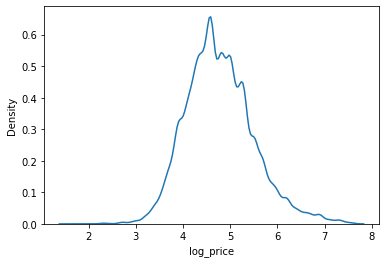

In [131]:
sns.kdeplot(data['log_price'])

**Categorical varaiables distribution**

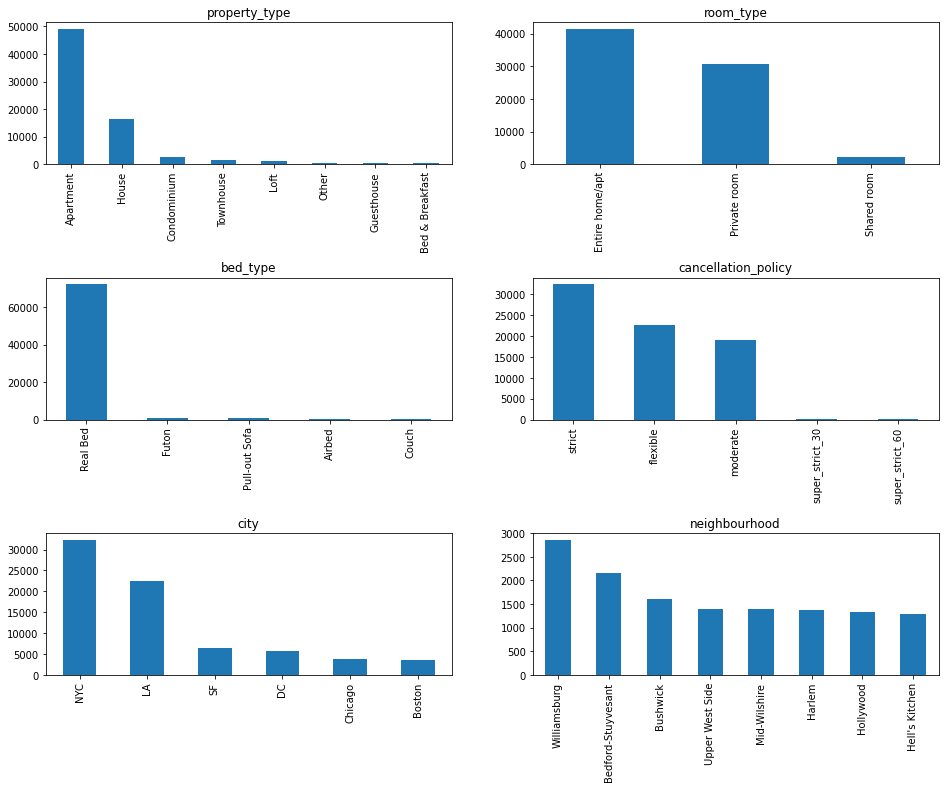

In [132]:
fig, axes = plt.subplots(3,2,figsize=(16,12))
fig.subplots_adjust(hspace=0.8)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 2
max_bars = 8

for i,variable in enumerate(categorical_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(data[variable].nunique(),max_bars)
    vc = data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

We notice that there are no prominent neighbourhoods, we would like to check number of unique values:

In [133]:
len(data['neighbourhood'].unique())

620

There are too many neighbourhoods with no prominent ones. Since we also have longtitude and latitude - we will drop neighbourhood column.

In [134]:
columns_to_drop.append('neighbourhood')
categorical_variables.remove('neighbourhood')

**Date columns distribution**

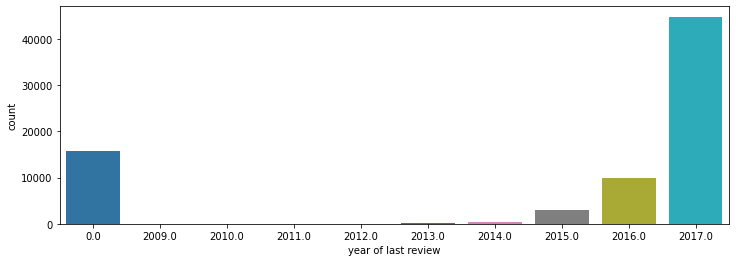

In [135]:
years_of_last_review = pd.DataFrame({
    'year of last review':pd.to_datetime(data['last_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0)
})

plt.figure(figsize=(12,4))
sns.countplot(x="year of last review", data=years_of_last_review)
plt.show()

### **Correlations Plots**

Text(0.5, 1.0, 'Log Price Distribution Per Accommodates Value')

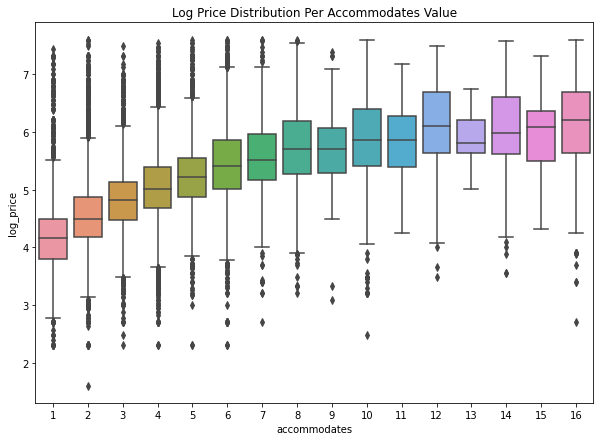

In [136]:
fig = plt.figure(figsize = (10,7))
sns.boxplot(x=data['accommodates'], y=data['log_price'])
plt.title('Log Price Distribution Per Accommodates Value')

Text(0.5, 1.0, 'Log Price Distribution Per City Value')

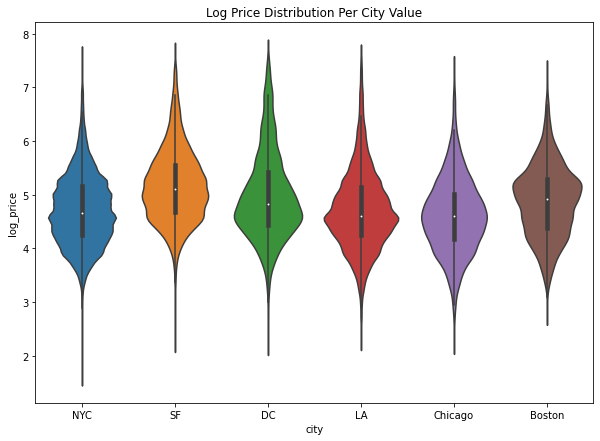

In [137]:
fig = plt.figure(figsize = (10,7))
sns.violinplot(x=data['city'], y=data['log_price'])
plt.title('Log Price Distribution Per City Value')

Text(0.5, 1.0, 'Log Price Distribution Per Room Type Value')

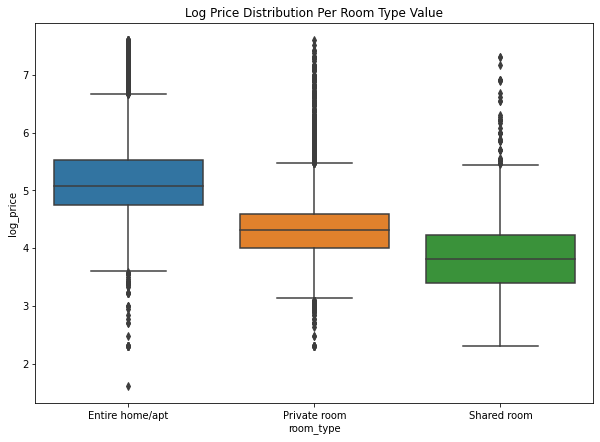

In [138]:
fig = plt.figure(figsize = (10,7))
sns.boxplot(x=data['room_type'], y=data['log_price'])
plt.title('Log Price Distribution Per Room Type Value')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


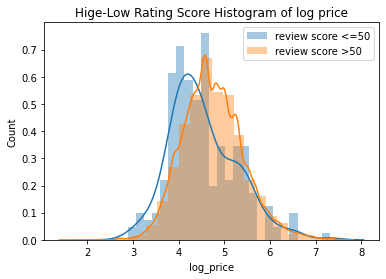

In [139]:
fig,ax=plt.subplots()

reviewScoreLow = data[data['review_scores_rating'] <= 50]
reviewScoreHigh = data[data['review_scores_rating'] > 50]

sns.distplot(reviewScoreLow.log_price, bins = 25, kde = True, label = "review score <=50",ax=ax)
sns.distplot(reviewScoreHigh.log_price, bins = 25, kde = True, label = "review score >50",ax=ax)


plt.title('Hige-Low Rating Score Histogram of log price')
plt.xlabel('log_price')
plt.ylabel('Count')
plt.legend(loc="upper right")

## 2. Data Cleaning and Feature Engeeniring 

#### This section includes: handling of special columns, droping of unnecessary columns, handling of null values, one-hot encoding for categorial columns, type convertion and columns equalization.

### Handling thumbnail_url Column

We converted the thumbnail_url column (which contained a link to the property image) into two new columns we prepared ahead on a seperate code (attached in the submission folder):
1. brightness - a numeric value of the brightness of the image
2. images_tags - we passed the images into an existing model that base on InceptionV3 model - the model can be found on the link: https://github.com/moe18/Image-Based-Airbnb-Pricing-Algorithm.git
to predict a property price by image. The model predict house price by image - we add this prediction as a new feature instead of thumbnail_url.

In [140]:
brightness = pd.read_csv('dataset/brightness.csv')['brightness']
data['brightness'] = brightness

images_tags = pd.read_csv('dataset/price_by_model.csv')['price_by_model']
data['images_tags'] = images_tags

In [141]:
columns_to_drop.append('thumbnail_url')
numeric_variables.extend(['brightness','images_tags'])

### Handling Dates Columns

We would like to convert the dates columns into a numeric columns with a float that represent number of years until today's date.

In [142]:
data = convert_date_to_years_since(data, dates_variables)
numeric_variables.extend(dates_variables)
dates_variables = []

NameError: name 'convert_date_to_years_since' is not defined

convertion result example:

In [143]:
data['last_review'][0]

'2016-07-18'

### Handling host_response_rate


Right now the host_response_rate column has the shape of 'n%'. We would like to convert it to floats between 0 to 1.

In [144]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0

### Drop Unnecessary Columns

In [145]:
columns_to_drop

['zipcode',
 'id',
 'description',
 'name',
 'beds',
 'bedrooms',
 'host_has_profile_pic',
 'neighbourhood',
 'thumbnail_url']

In [146]:
for column in columns_to_drop:
    data = data.drop(column, axis=1)

### Train - Test Split

For the following operations, in order thr prevent data leak from our test set, we would
like to split data into train and test and perform operations on both sets seperatly.

In [155]:
train, test = train_test_split(data, test_size=0.2)
train = train.reset_index()
test = test.reset_index()

### Impute Missing Values


replacing zero value with nan at brightness and price_by_model columns

In [158]:
cols = ['brightness', 'images_tags']
train[cols] = train[cols].replace({'0': np.nan, 0: np.nan})



In [159]:
train[train.columns[train.isnull().any()]].isnull().sum()


bathrooms                 149  
first_review              12635
host_identity_verified    144  
host_response_rate        14591
host_since                144  
last_review               12603
review_scores_rating      13326
brightness                6704 
images_tags               6742 
dtype: int64

For all the above columns (and test's null columns) we will impute missing values with most frequent. We would like to denpte that we tried other methods as well.

In [151]:
train, test = impute_with_most_frequent(train,test)


TypeError: imputing_with_most_frequent() missing 2 required positional arguments: 'test' and 'null_columns'

### Handling amenities Column

Right now the amenitis column is a string column where each string describe a list of amenities of the property. The Data has around 60,000 different unique values. 
We will read those string, collect all the amenities and create boolean column for the top 50 amenities in the train data.

In [ ]:
train, test = convert_amenities_col(train, test, binary_variables)

### Types Conversion

In [ ]:
for variable in categorical_variables:
    train[variable] = train[variable].astype("category")
    test[variable] = test[variable].astype("category")
    
for variable in numeric_variables:
    train[variable] = train[variable].astype(float)
    test[variable] = test[variable].astype(float)
    
for column in binary_variables:
    train[column] = train[column].apply(lambda x: 1 if x == 'TRUE' or x == 't' else 0)
    test[column] = test[column].apply(lambda x: 1 if x == 'TRUE' or x == 't' else 0)

### One-Hot Encoding of Categorical_Variables

In [ ]:
for variable in categorical_variables:
    onehot_train_col = pd.get_dummies(train[variable], prefix=variable)
    train =  pd.concat([train, onehot_train_col], axis=1)
    train = train.drop(variable, axis=1)
    
    onehot_test_col = pd.get_dummies(test[variable], prefix=variable)
    test =  pd.concat([test, onehot_test_col], axis=1)
    test = test.drop(variable, axis=1)

### Equalize Columns

In [ ]:
add_to_test = list(set(train.columns) - set(test.columns))
add_to_train = list(set(test.columns) - set(train.columns))
for col in add_to_train:
    train[col] = 0
for col in add_to_test:
    test[col] = 0

test = test[train.columns]

In [ ]:
train.shape

In [ ]:
test.shape

## 3. Model Training, Prediction and Evaluation

In [ ]:
train_y = train['log_price'].values
train_x = train.drop('log_price', axis=1)

test_y = test['log_price'].values
test_x = test.drop('log_price', axis=1)

xgb_r = xg.XGBRegressor()

# Fitting the model
xgb_r.fit(train_x, train_y)
 
# Predict the model
prediction_test = xgb_r.predict(test_x)

# Evaluate the model
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.3f}".format(mean_absolute_error(test_y, prediction_test)))
print("Mean Squared Error (Σ(|y-pred|/y)/n):",
      "{:,.3f}".format(mean_squared_error(test_y, prediction_test)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.3f}".
      format(np.sqrt(mean_squared_error(test_y, prediction_test))))
print("r2 score:", "{:,.3f}".format(r2_score(test_y, prediction_test)))

We would like to denote that we also tried to pedict log price price per acommodates but it did not improve results.

## 4. Model Investigation and Error Analysis

### Residuals

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction_test,y=test_y,ax=ax)
sns.lineplot(x=prediction_test,y=prediction_test,ax=ax,color='black')
plt.title('Residuals')
plt.xlabel('Prediction')
plt.ylabel('Tags')

The residuals graph shows quite good results of the model. We do observe some pattern of large residuals for the higher and lower tags.

In [ ]:
residuals = test_y - prediction_test
residuals_for_kde = pd.DataFrame(residuals)
sns.kdeplot(residuals_for_kde[0])

The residuals are normaly distributed around 0 as expected.

####  max over estimated and max under estimated

In [ ]:
max_over_estimated = abs(min(residuals))
max_under_estimated = max(residuals)
max_over_idx = list(residuals).index(min(residuals))
max_under_idx = list(residuals).index(max(residuals))
print("Max over estimated error (log price):", "{:,.0f}".format(max_over_estimated))
print("Max under estimated error (log price):", "{:,.0f}".format(max_under_estimated))

### Relative Residuals

In [ ]:
rel_res=abs(residuals/test_y)
print(f'{int((len(rel_res[rel_res<0.05])/len(rel_res))*100)}% of the test set examples have error less than 5%')
print(f'{int((len(rel_res[rel_res<0.1])/len(rel_res))*100)}% of the test set examples have error less than 10%')
print(f'{int((len(rel_res[rel_res>0.2])/len(rel_res))*100)}% of the test set examples have error greater than 20%')


We should be reminded that we predicted the log price, we would like to analyse the predictions on the actual prices

### Actual Price Residuals

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=np.exp(prediction_test),y=np.exp(test_y),ax=ax)
sns.lineplot(x=prediction_test,y=prediction_test,ax=ax,color='black')
plt.title('Residuals')
plt.xlabel('Prediction')
plt.ylabel('Tags')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

In this case the residuals graphs looks weakr, especialy for the higher tags. 

In [ ]:
actual_res = np.exp(test_y) - np.exp(prediction_test)
actual_res_for_kde = pd.DataFrame(actual_res)
sns.kdeplot(actual_res_for_kde[0])

### Actual Price Relative Residuals

In [ ]:
act_rel_res = abs(actual_res/np.exp(test_y))
print(f'{int((len(act_rel_res[act_rel_res<0.05])/len(act_rel_res))*100)}% of the test set examples have error less than 5%')
print(f'{int((len(act_rel_res[act_rel_res<0.1])/len(act_rel_res))*100)}% of the test set examples have error less than 10%')
print(f'{int((len(act_rel_res[act_rel_res>0.2])/len(act_rel_res))*100)}% of the test set examples have error greater than 20%')

The actual situation is worse. We should remember that relativley small error between log values may be greater when converting to real numbers.

###  SHAP Analysis of the Test Examples

In [ ]:
explainer = shap.TreeExplainer(xgb_r, train_x)
shap_values = explainer(test_x)
shap.plots.beeswarm(shap_values)

We note two interesting points.   
First, We see that latitude and longitude have high shap importance scores. This can make sense but still we feel like this interpretability is not intuitive enough. We feel like high scores for high latitude values and low scores for high longitude valuse, as seen above, is too simplified. We would like to thonk of a better way to extract information from these features.  
Second, we see that number_of_reviews is one of the important features and it has negative correlation with the predicted price. It is quite not intuitive, since in the real world we could assume that a property with many reviews colud have charge higher. If so, we can assert that this feature inserts noise into our data and therefore drop it. We must be carfeul with that assertion since the data can hold patterns that we will not think about. For example, it may be that more expensive properties do not have mant guests, therefore they do not have many reviews. Anyway, it will be interesting to test the model without this feature.  
It is interesting to check the correlation between log_price column and number_of_reviews:

In [ ]:
data[['log_price','number_of_reviews']].corr()

The correlation is low, it support the assumption that the column inserts some npise into the data.

In [ ]:
shap.dependence_plot('room_type_Entire home/apt', shap_values.values, test_x, show=False)
plt.title("The Marginal Effect of 'room_type_Entire home/apt' on the Predictions'\n")
plt.show()

In [ ]:
shap.dependence_plot('accommodates', shap_values.values, test_x, show=False)
plt.title("The Marginal Effect of 'accommodates' on the Predictions'\n")
plt.show()

In [ ]:
shap.dependence_plot('number_of_reviews', shap_values.values, test_x, show=False)
plt.title("The Marginal Effect of 'number_of_reviews' on the Predictions'\n")
plt.show()

We observese logical and clear behavior for the 'room_type_Entire home/apt' and 'accommodates'features, but it is not clear what is going on with the 'number_of_reviews' feature.  
we see that for small number of reviews we have a range of shao scores and as it goes higher the shap score gores lower. It may have some explanation that we can not think of, but as said before, it is interesting to test the model withput this feature.

In [ ]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

We obsreve that our test data can be splited into two groups: properties with room type- entire room/apt and properties without that feature. In most of the other features there is no major difference for the shap scores of the features. We do see some difference on the bathrooms feature.

SHAP local investigation of some random examples

In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values[0], test_x.iloc[0])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values[1], test_x.iloc[1])

### Over/Under Estimations

In [ ]:
# define rel_res again with no abs to get over/under estimates
rel_res=residuals/test_y

In [ ]:
most_over_est_ind = np.where(rel_res==rel_res.min())[0][0]
print("most over estimated example:")
print("example's tag: " +str(test_y[most_over_est_ind]) + "example's prediction: " + str(prediction_test[most_over_est_ind]))

In [ ]:
most_under_est_ind = np.where(rel_res==rel_res.max())[0][0]
print("most under estimated example:")
print("example's tag: " +str(test_y[most_under_est_ind])  + "example's prediction: " + str(prediction_test[most_under_est_ind]))

### SHAP analysis of the most over estimated example

In [ ]:
shap.plots.waterfall(shap_values[most_over_est_ind])

### SHAP analysis of the most under estimated example

In [ ]:
shap.plots.waterfall(shap_values[most_under_est_ind])

In [ ]:
over_estimates = test_x.loc[np.where(rel_res<-0.05)]
under_estimates = test_x.loc[np.where(rel_res>0.05)]
good_estimates = test_x.loc[np.where(abs(rel_res)<0.05)]

### SHAP analysis of under estimated examples

In [ ]:
under_est_shap_values = explainer(under_estimates)
shap.plots.beeswarm(under_est_shap_values)

### Comparison of good and under estimated gropus distribution

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
good_estimates['room_type_Entire home/apt'].hist(ax=ax,color='blue')
under_estimates['room_type_Entire home/apt'].hist(ax=ax,color='red')

### SHAP analysis of over estimated examples

In [ ]:
over_est_shap_values = explainer(over_estimates)
shap.plots.beeswarm(over_est_shap_values)

### Comparison of good and over estimated gropus distribution

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
good_estimates['longitude'].hist(ax=ax,color='blue')
over_estimates['longitude'].hist(ax=ax,color='red')

We checked many features distribution comparison (for under and over entimations) and they all showed similars distributions with good estimations.

We did not find any patterns regarding to under/over estimations.  
We did found few examples where at the description column we discovered that the price pffered is for a month rather than a night, that can make an explenation of some under estimated examples. But, we also found many opposite examples, so we can not assert that this is a pattern. It may be that the 'description' column that we droped could have contribute more information, for this case and in general.  
It may be that beacause of any other decision that we took while proccessing the data, we did not extract all the information that we could have.  
At last, we should remember that the pricing proccess is manual and each property owner can put any price he wants, In addition, we assume that the data was taken from airbnb website where each property owner inserts the property's details by itself and can make mistakes. Therefore another posibilty is that that data is 'dirty'

## 5. Conclusions Implementation

As a conclusion from the analysis section, we would like to try the following changes:
1. convert longitude latitude features 